
# Crank–Nicolson Down-and-Out Call (Black–Scholes, $q=0$) Need to add in our parameters

Let $S\in(B,\infty)$ with **continuous barrier** at $S=B$ and maturity $T$. Work in log-space $x=\ln S$.

## PDE (log-space)

Define

$$
a=\tfrac{1}{2}\sigma^2,\qquad b=r-\tfrac{1}{2}\sigma^2,\qquad c=-r.
$$

The option value $V(t,x)$ satisfies

$$
\boxed{ \; V_t \;=\; a\,V_{xx} + b\,V_x + c\,V \; } \quad \text{for}\;\; x\in(\ln B,\infty),\; t\in[0,T).
$$

## Grid, payoff, and boundary conditions

Uniform grid in time and log-price:

$$
t_n = n\,\Delta t,\;\; n=0,\ldots,M,\qquad
x_i = x_{\min} + i\,\Delta x,\;\; i=0,\ldots,N,
$$

with $x_{\min}=\ln B$ so that the **barrier is exactly the left boundary**.

* **Payoff at maturity** $t=T$ ($n=M$):

  $$
  V(T,x_i)=\max\!\big(e^{x_i}-K,\,0\big)\;\; \text{for } x_i>\ln B,\qquad
  V(T,x_0)=R \; \text{(rebate; default } R=0\text{).}
  $$

* **Left boundary (barrier)** for all $t$:

  $$
  V(t,x_0)=R.
  $$

* **Right boundary (large $S$)**:
  Use Dirichlet from linear asymptotic:

  $$
  V(t,x_N)\approx e^{x_N} - K\,e^{-r\,(T-t)}.
  $$

  (Alternatively, one may impose the Robin form $V_x(t,x_N)=e^{x_N}$; Dirichlet is standard and robust.)

Let $S_i=e^{x_i}$.

## Spatial discretisation (central differences)

For interior nodes $i=1,\ldots,N-1$,

$$
(A V)_i \;=\; a\,\frac{V_{i+1}-2V_i+V_{i-1}}{\Delta x^2}
\;+\; b\,\frac{V_{i+1}-V_{i-1}}{2\Delta x}
\;+\; c\,V_i.
$$

This yields a tri-diagonal operator with coefficients

$$
\boxed{
\begin{aligned}
\ell &:= \frac{a}{\Delta x^2} - \frac{b}{2\Delta x},\\[2pt]
d &:= -\frac{2a}{\Delta x^2} + c,\\[2pt]
u &:= \frac{a}{\Delta x^2} + \frac{b}{2\Delta x}.
\end{aligned}}
$$

Hence, for an interior row $i$: $(A V)_i=\ell\,V_{i-1}+d\,V_i+u\,V_{i+1}$.

## Crank–Nicolson time stepping

With $\theta=\tfrac{1}{2}$ (CN),

$$
\boxed{\;(I-\theta\Delta t\,A)\,V^{n+1} \;=\; (I+(1-\theta)\Delta t\,A)\,V^{n}\;},\qquad n=M-1,\ldots,0.
$$

Writing out the row $i$ ($1\le i\le N-1$):

$$
(-\theta\Delta t\,\ell)\,V_{i-1}^{n+1} + (1-\theta\Delta t\,d)\,V_i^{n+1} + (-\theta\Delta t\,u)\,V_{i+1}^{n+1}
= (1+(1-\theta)\Delta t\,d)\,V_i^n + (1-\theta)\Delta t\,\ell\,V_{i-1}^n + (1-\theta)\Delta t\,u\,V_{i+1}^n.
$$

### First interior node $i=1$ — incorporating the barrier

At $i=1$, the formulas involve $V_0^{n}$ and $V_0^{n+1}$, but $V_0^{\cdot}=R$ is known. Define the convenient coefficients

$$
\begin{aligned}
\;l_{\text{lhs}}&:=\theta\Delta t\,\ell, &\quad d_{\text{lhs}}&:=1-\theta\Delta t\,d, &\quad u_{\text{lhs}}&:=-\theta\Delta t\,u,\\
\;l_{\text{rhs}}&:=(1-\theta)\Delta t\,\ell,&\quad d_{\text{rhs}}&:=1+(1-\theta)\Delta t\,d, &\quad u_{\text{rhs}}&:=(1-\theta)\Delta t\,u.
\end{aligned}
$$

Then the **CN row for $i=1$** is

$$
\boxed{\;
d_{\text{lhs}}\,V_{1}^{n+1} + u_{\text{lhs}}\,V_{2}^{n+1}
= d_{\text{rhs}}\,V_{1}^{n} + u_{\text{rhs}}\,V_{2}^{n}
+ l_{\text{rhs}}\,V_{0}^{n} - l_{\text{lhs}}\,V_{0}^{n+1}
\;}
$$

and since $V_0^{n}=V_0^{n+1}=R$, this is a known boundary contribution added to the RHS.

### Right boundary row $i=N$

Use the Dirichlet value $V_{N}^{n+1}=e^{x_N}-K\,e^{-r\,(T-t_{n+1})}$ directly; eliminate it from the interior system via the $i=N-1$ row (standard Dirichlet handling).

## Rannacher damping (to smooth the payoff kink & barrier discontinuity)

Replace the first two CN steps by **two backward-Euler (BE) steps**:

$$
(I-\Delta t\,A)\,V^{M-1}=V^{M},\qquad
(I-\Delta t\,A)\,V^{M-2}=V^{M-1},
$$

then continue with CN for $n=M-2,\,M-3,\ldots,0$.

*(A common alternative is two half-steps of BE with $\Delta t/2$; using two full BE steps is also effective and simple.)*

## Assembly summary

1. Build vectors $x_i$ and $S_i=e^{x_i}$; set payoff at $t=T$.
2. Precompute $\ell,d,u$ and the CN/BE tri-diagonals.
3. At each step, apply Dirichlet BCs at $i=0$ (barrier, $V=R$) and $i=N$ (large-$S$ formula), moving known terms to the RHS.
4. Solve the tri-diagonal system for $V^{n+1}$.

## Convergence & EOC

Use a grid ladder with matched $(N,M)$:

$$
(60,60)\;\rightarrow\;(120,120)\;\rightarrow\;(240,240)\;\rightarrow\;(480,480).
$$

Let $P_h$ be the price at your target $(t=0,S=S_0)$ on mesh size $h$ (with $h\propto\Delta x$ and $\Delta t\propto\Delta x$). The **experimental order of convergence (EOC)** is

$$
\boxed{\;
\text{EOC} \;\approx\; 
\frac{\log\!\big(\,\lvert P_h - P_{h/2}\rvert \big)\;-\;\log\!\big(\,\lvert P_{h/2} - P_{h/4}\rvert \big)}{\log 2}
\;}
$$



=== CN Down-and-Out Call (continuous) ===
S0=35.0000, K=35.0000, B=28.0000, T=0.5000, r=4.5000%, sigma=55.0000%, rebate=0.0
  M   N    Price  Abs change vs prev
 60  60 4.866310                 NaN
120 120 4.863830            0.002481
240 240 4.863438            0.000391
480 480 4.863215            0.000224
EOC (60→120→240): 2.6643
Vanilla BS call:  5.734434
DO call (fine):   4.863215
DI by parity:     0.871220
Wrote: cn_do_call_convergence.csv, cn_do_call_profile.png



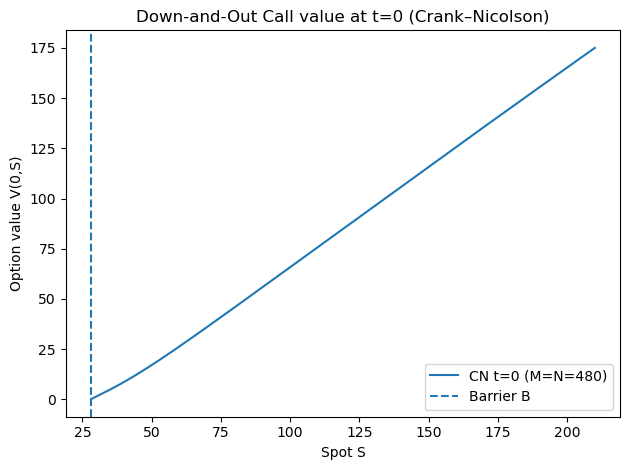

In [1]:
"""
Crank–Nicolson Barrier Option Pricer (Down-and-Out Call, continuous monitoring).
- Non-dividend-paying underlying (q = 0).
- Log-space discretisation with the barrier aligned to the left boundary (Dirichlet).
- Rannacher damping (2 implicit Euler steps) to restore 2nd-order convergence near payoff kinks.
- Convergence ladder + Experimental Order of Convergence (EOC) report.
- Optional parity check vs vanilla Black–Scholes call.

Dependencies: numpy, matplotlib (for plotting), pandas (for the convergence table).

Usage
-----
$ python cn_barrier_pltr_demo.py

Then edit the PARAMETERS section to your desired S0, K, B, T, r, sigma and rerun.
"""

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, List, Dict

# ------------------------------
# Utilities
# ------------------------------

def thomas(a: np.ndarray, b: np.ndarray, c: np.ndarray, d: np.ndarray) -> np.ndarray:
    """
    Thomas algorithm for tridiagonal systems:
      a[i]*x[i-1] + b[i]*x[i] + c[i]*x[i+1] = d[i]
    a[0] and c[-1] are ignored.
    """
    n = len(d)
    c_ = np.empty(n-1)
    d_ = np.empty(n)
    b_ = b.copy()

    c_[0] = c[0] / b_[0]
    d_[0] = d[0] / b_[0]
    for i in range(1, n-1):
        denom = b_[i] - a[i]*c_[i-1]
        c_[i] = c[i] / denom
        d_[i] = (d[i] - a[i]*d_[i-1]) / denom
    d_[-1] = (d[-1] - a[-1]*d_[-2]) / (b_[-1] - a[-1]*c_[-2])

    x = np.empty(n)
    x[-1] = d_[-1]
    for i in range(n-2, -1, -1):
        x[i] = d_[i] - c_[i]*x[i+1]
    return x

def bs_call_price(S0: float, K: float, r: float, sigma: float, T: float) -> float:
    """Black–Scholes vanilla call (q=0)."""
    if T <= 0:
        return max(S0 - K, 0.0)
    d1 = (math.log(S0/K) + (r + 0.5*sigma**2)*T) / (sigma*math.sqrt(T))
    d2 = d1 - sigma*math.sqrt(T)
    N = lambda x: 0.5*(1.0 + math.erf(x/math.sqrt(2)))
    return S0*N(d1) - K*math.exp(-r*T)*N(d2)

# ------------------------------
# Crank–Nicolson DO Call (log-space)
# ------------------------------

def price_do_call_cn(
    S0: float, K: float, B: float, r: float, sigma: float, T: float,
    Smax_factor: float = 6.0, M: int = 400, N: int = 400,
    rebate: float = 0.0, use_rannacher: bool = True,
    return_grid: bool = False
) -> Tuple[float, Tuple[np.ndarray, np.ndarray]]:
    """
    Price a continuously monitored Down-and-Out Call with Dirichlet boundary at S=B.
    PDE in log-space x=ln S; barrier is the left boundary x_min=ln B.

    Returns
    -------
    price : float
    (S_grid, V_grid) : if return_grid=True, the t=0 profile arrays are returned.
    """
    if not (B < S0):
        raise ValueError("For DO options require B < S0.")

    # Spatial/log grid
    Smax = Smax_factor * max(S0, K)
    x_min = math.log(B)
    x_max = math.log(Smax)
    M = int(M); N = int(N)
    dx = (x_max - x_min) / M
    dt = T / N

    x = x_min + dx*np.arange(M+1)
    S = np.exp(x)

    # PDE coefficients for V_t = a V_xx + b V_x + c V
    a = 0.5 * sigma * sigma
    b = r - 0.5 * sigma * sigma
    c = -r

    # Terminal payoff (at t=T -> tau=0), apply knockout at/under barrier
    V = np.maximum(S - K, 0.0)
    V[S <= B] = rebate  # barrier node is included

    # Build tridiagonal matrices for interior nodes 1..M-1
    m = M - 1
    if m <= 0:
        raise ValueError("Increase M; need at least 2 interior nodes.")

    # Discrete operator (this sign convention matches the CN assembly below)
    A_lower = (a/dx**2) - (b/(2*dx))
    A_main  = (-2*a/dx**2) + c
    A_upper = (a/dx**2) + (b/(2*dx))

    # CN matrices
    l_lhs = -0.5*dt*A_lower * np.ones(m)
    d_lhs = (1.0 - 0.5*dt*A_main) * np.ones(m)
    u_lhs = -0.5*dt*A_upper * np.ones(m)

    l_rhs = +0.5*dt*A_lower * np.ones(m)
    d_rhs = (1.0 + 0.5*dt*A_main) * np.ones(m)
    u_rhs = +0.5*dt*A_upper * np.ones(m)

    # Fully implicit matrices (Rannacher start)
    l_be = -dt*A_lower * np.ones(m)
    d_be = (1.0 - dt*A_main) * np.ones(m)
    u_be = -dt*A_upper * np.ones(m)

    def step_once(Vn: np.ndarray, tau: float, scheme: str = "CN") -> np.ndarray:
        """Advance one time step in pseudo-time tau (tau = T - t)."""
        # Boundaries
        V_left_n = rebate
        V_left_np1 = rebate

        t_rem_n = T - tau
        t_rem_np1 = T - (tau + dt)
        V_right_n = S[-1] - K*math.exp(-r*t_rem_n)     # call asymptote at large S
        V_right_np1 = S[-1] - K*math.exp(-r*t_rem_np1)

        Vn_int = Vn[1:M]  # interior slice

        if scheme == "BE":
            rhs = Vn_int.copy()
            rhs[0]  += dt * A_lower * V_left_np1
            rhs[-1] += dt * A_upper * V_right_np1
            V_int_np1 = thomas(l_be, d_be, u_be, rhs)

        elif scheme == "CN":
            # RHS = (I + 0.5 dt A) V^n + boundary terms (at n and n+1)
            rhs = d_rhs * Vn_int
            rhs[1:] += l_rhs[1:] * Vn_int[:-1]
            rhs[:-1] += u_rhs[:-1] * Vn_int[1:]

            rhs[0]  += l_rhs[0] * V_left_n
            rhs[-1] += u_rhs[-1] * V_right_n

            rhs[0]  += -l_lhs[0] * V_left_np1
            rhs[-1] += -u_lhs[-1] * V_right_np1

            V_int_np1 = thomas(l_lhs, d_lhs, u_lhs, rhs)
        else:
            raise ValueError("scheme must be 'BE' or 'CN'.")

        Vnp1 = Vn.copy()
        Vnp1[0]   = V_left_np1
        Vnp1[1:M] = V_int_np1
        Vnp1[M]   = V_right_np1
        Vnp1[S <= B] = rebate  # enforce knockout
        return Vnp1

    # Time stepping (Rannacher damping: 2 BE steps, then CN)
    tau = 0.0
    if use_rannacher:
        V = step_once(V, tau, scheme="BE"); tau += dt
        V = step_once(V, tau, scheme="BE"); tau += dt
    for _ in range(max(0, N - (2 if use_rannacher else 0))):
        V = step_once(V, tau, scheme="CN")
        tau += dt

    # Interpolate price at S0
    x0 = math.log(S0)
    i_float = (x0 - x_min)/dx
    i = int(np.clip(i_float, 1, M-1))
    w = i_float - i
    price = (1 - w)*V[i] + w*V[i+1]
    return (float(price), (S, V)) if return_grid else (float(price), (None, None))

# ------------------------------
# Convergence ladder
# ------------------------------

def convergence_ladder(
    S0: float, K: float, B: float, r: float, sigma: float, T: float,
    grid_pairs: List[Tuple[int,int]] = ((60,60),(120,120),(240,240),(480,480)),
    rebate: float = 0.0
) -> Tuple[pd.DataFrame, float]:
    """
    Run CN on a sequence of grids and compute EOC using the first three levels.
    Returns the convergence table and EOC.
    """
    rows = []
    prev = None
    for (M,N) in grid_pairs:
        price, _ = price_do_call_cn(S0,K,B,r,sigma,T,M=M,N=N,rebate=rebate,return_grid=False)
        rows.append({"M": M, "N": N, "Price": price,
                     "Abs change vs prev": (None if prev is None else abs(price - prev))})
        prev = price
    df = pd.DataFrame(rows)
    if len(grid_pairs) >= 3:
        p0, p1, p2 = df.loc[0,"Price"], df.loc[1,"Price"], df.loc[2,"Price"]
        d1, d2 = abs(p1-p0), abs(p2-p1)
        eoc = (math.log(d1/d2, 2) if (d1>0 and d2>0) else float('nan'))
    else:
        eoc = float('nan')
    return df, eoc

# ------------------------------
# Demo / Main
# ------------------------------

def run_demo() -> Dict[str, float]:
    # ===== PARAMETERS (edit these) =====
    S0    = 35.0     # spot
    K     = 35.0     # strike
    B     = 28.0     # down-and-out barrier (must be < S0)
    T     = 0.5      # years to maturity
    r     = 0.045    # risk-free (continuous comp.)
    sigma = 0.55     # annual vol
    rebate = 0.0     # immediate rebate at KO time (Dirichlet boundary)
    # ===================================

    # Price on a fine grid and get profile for plotting
    price_fine, (Sgrid, Vgrid) = price_do_call_cn(S0,K,B,r,sigma,T,M=480,N=480,rebate=rebate,return_grid=True)

    # Convergence ladder
    df, eoc = convergence_ladder(S0,K,B,r,sigma,T, grid_pairs=((60,60),(120,120),(240,240),(480,480)), rebate=rebate)
    df.to_csv("cn_do_call_convergence.csv", index=False)

    # Plot profile at t=0
    mask = Sgrid >= B
    plt.figure()
    plt.plot(Sgrid[mask], Vgrid[mask], label="CN t=0 (M=N=480)")
    plt.axvline(B, linestyle="--", label="Barrier B")
    plt.title("Down-and-Out Call value at t=0 (Crank–Nicolson)")
    plt.xlabel("Spot S")
    plt.ylabel("Option value V(0,S)")
    plt.legend()
    plt.tight_layout()
    plt.savefig("cn_do_call_profile.png", dpi=160)

    # Vanilla vs Out/In parity (sanity check)
    vanilla = bs_call_price(S0, K, r, sigma, T)
    di = vanilla - price_fine

    # Console summary
    print("\n=== CN Down-and-Out Call (continuous) ===")
    print(f"S0={S0:.4f}, K={K:.4f}, B={B:.4f}, T={T:.4f}, r={r:.4%}, sigma={sigma:.4%}, rebate={rebate}")
    print(df.to_string(index=False))
    print(f"EOC (60→120→240): {eoc:.4f}")
    print(f"Vanilla BS call:  {vanilla:.6f}")
    print(f"DO call (fine):   {price_fine:.6f}")
    print(f"DI by parity:     {di:.6f}")
    print("Wrote: cn_do_call_convergence.csv, cn_do_call_profile.png\n")

    return {
        "vanilla": vanilla,
        "do_call": price_fine,
        "di_by_parity": di,
        "eoc_60_120_240": eoc
    }

if __name__ == "__main__":
    run_demo()

In [2]:
"""
Barrier Option Pricing — Continuous Only (Fast DEMO)
-----------------------------------------------
Includes ONLY:
- Crank–Nicolson PDE solver in log-space for a down-and-out call (continuous monitoring).
- Monte Carlo with Brownian-bridge crossing (continuous monitoring) using exact GBM steps,
  with antithetic variates, a vanilla-call control variate, and batching for speed.
"""

import numpy as np
import pandas as pd
import math

# ---------- Black–Scholes vanilla (for control variate) ----------
def bs_call_price(S0: float, K: float, r: float, sigma: float, T: float) -> float:
    if T <= 0.0:
        return max(S0 - K, 0.0)
    d1 = (math.log(S0/K) + (r + 0.5*sigma**2)*T) / (sigma*math.sqrt(T))
    d2 = d1 - sigma*math.sqrt(T)
    N = lambda x: 0.5*(1.0 + math.erf(x/math.sqrt(2)))
    return S0*N(d1) - K*math.exp(-r*T)*N(d2)

# ---------- CN (Crank–Nicolson) DO call, continuous monitoring ----------
def _thomas(a, b, c, d):
    """Standard Thomas algorithm for tridiagonal systems."""
    n = len(d)
    cp = np.empty(n-1)
    dp = np.empty(n)
    bp = b.copy()
    cp[0] = c[0] / bp[0]
    dp[0] = d[0] / bp[0]
    for i in range(1, n-1):
        denom = bp[i] - a[i]*cp[i-1]
        cp[i] = c[i] / denom
        dp[i] = (d[i] - a[i]*dp[i-1]) / denom
    dp[-1] = (d[-1] - a[-1]*dp[-2]) / (bp[-1] - a[-1]*cp[-2])
    x = np.empty(n)
    x[-1] = dp[-1]
    for i in range(n-2, -1, -1):
        x[i] = dp[i] - cp[i]*x[i+1]
    return x

def price_do_call_cn(S0, K, B, r, sigma, T, Smax_factor=6.0, M=400, N=400,
                     rebate=0.0, use_rannacher=True) -> float:
    """Down-and-out call via CN in log-space with barrier as Dirichlet boundary at left end."""
    if not (B < S0):
        raise ValueError("For DO options require B < S0.")

    Smax = Smax_factor * max(S0, K)
    x_min = math.log(B)
    x_max = math.log(Smax)
    M = int(M); N = int(N)
    dx = (x_max - x_min) / M
    dt = T / N
    x = x_min + dx*np.arange(M+1)
    S = np.exp(x)

    a = 0.5*sigma*sigma
    b = r - 0.5*sigma*sigma
    c = -r

    V = np.maximum(S - K, 0.0)
    V[S <= B] = rebate

    m = M - 1
    if m <= 0:
        raise ValueError("Increase M; need at least 2 interior nodes.")

    A_lower = (a/dx**2) - (b/(2*dx))
    A_main  = (-2*a/dx**2) + c
    A_upper = (a/dx**2) + (b/(2*dx))

    l_lhs = -0.5*dt*A_lower*np.ones(m)
    d_lhs = (1.0 - 0.5*dt*A_main)*np.ones(m)
    u_lhs = -0.5*dt*A_upper*np.ones(m)

    l_rhs = +0.5*dt*A_lower*np.ones(m)
    d_rhs = (1.0 + 0.5*dt*A_main)*np.ones(m)
    u_rhs = +0.5*dt*A_upper*np.ones(m)

    l_be = -dt*A_lower*np.ones(m)
    d_be = (1.0 - dt*A_main)*np.ones(m)
    u_be = -dt*A_upper*np.ones(m)

    def step(Vn, tau, scheme="CN"):
        Vn_int = Vn[1:M]
        V_left_n = rebate
        V_left_np1 = rebate
        t_rem_n = T - tau
        t_rem_np1 = T - (tau + dt)
        V_right_n = S[-1] - K*math.exp(-r*t_rem_n)
        V_right_np1 = S[-1] - K*math.exp(-r*t_rem_np1)
        if scheme == "BE":
            rhs = Vn_int.copy()
            rhs[0]  += dt*A_lower*V_left_np1
            rhs[-1] += dt*A_upper*V_right_np1
            V_int_np1 = _thomas(l_be, d_be, u_be, rhs)
        else:
            rhs = d_rhs*Vn_int
            rhs[1:] += l_rhs[1:]*Vn_int[:-1]
            rhs[:-1] += u_rhs[:-1]*Vn_int[1:]
            rhs[0]  += l_rhs[0]*V_left_n
            rhs[-1] += u_rhs[-1]*V_right_n
            rhs[0]  -= l_lhs[0]*V_left_np1
            rhs[-1] -= u_lhs[-1]*V_right_np1
            V_int_np1 = _thomas(l_lhs, d_lhs, u_lhs, rhs)
        Vnp1 = Vn.copy()
        Vnp1[0] = V_left_np1
        Vnp1[1:M] = V_int_np1
        Vnp1[M] = V_right_np1
        Vnp1[S <= B] = rebate
        return Vnp1

    tau = 0.0
    if use_rannacher:
        V = step(V, tau, "BE"); tau += dt
        V = step(V, tau, "BE"); tau += dt
    for _ in range(max(0, N - (2 if use_rannacher else 0))):
        V = step(V, tau, "CN"); tau += dt

    # interpolate price at S0
    x0 = math.log(S0)
    i_float = (x0 - x_min)/dx
    i = int(np.clip(i_float, 1, M-1))
    w = i_float - i
    price = (1 - w)*V[i] + w*V[i+1]
    return float(price)

# ---------- MC (continuous monitoring): exact GBM + Brownian-Bridge (BATCHED) ----------
def _exact_gbm_step(S, r, sigma, dt, Z):
    return S * np.exp((r - 0.5*sigma*sigma)*dt + sigma*math.sqrt(dt)*Z)

def simulate_do_exact_bb_payoffs(S0, K, B, r, sigma, T, steps_per_year, Z, U):
    """
    Simulate one batch: exact GBM stepping + Brownian-bridge crossing per step.
    Returns (barrier_payoffs, vanilla_payoffs).
    """
    n_paths = Z.shape[0]
    steps_total = int(round(steps_per_year*T))
    dt = T / steps_total
    S = np.full(n_paths, S0, dtype=float)
    alive = np.ones(n_paths, dtype=bool)

    for k in range(steps_total):
        S_prev = S.copy()
        S = _exact_gbm_step(S, r, sigma, dt, Z[:, k])

        certain = (S_prev <= B) | (S <= B)
        ok = (~certain)
        phit = np.zeros(n_paths, dtype=float)
        if np.any(ok):
            ln1 = np.log(S_prev[ok] / B)
            ln2 = np.log(S[ok] / B)
            phit_ok = np.exp(-2.0 * ln1 * ln2 / (sigma*sigma*dt))
            phit_ok = np.clip(phit_ok, 0.0, 1.0)
            phit[ok] = phit_ok
        phit[certain] = 1.0

        knocked = (U[:, k] < phit)
        alive &= (~knocked)

    vanilla = np.maximum(S - K, 0.0)
    barrier = vanilla.copy()
    barrier[~alive] = 0.0
    return barrier, vanilla

def mc_do_continuous_bb_price(S0, K, B, r, sigma, T,
                              steps_per_year, n_paths, seed=0,
                              antithetic=True, control_variate=True,
                              batch_size=5000, verbose=False):
    """
    Brownian-bridge continuous barrier MC with batching + streaming stats.
    Avoids allocating (n_paths x steps_total) arrays.
    Returns: price, SE, CI, diagnostics
    """
    # ensure even for antithetic
    if antithetic and n_paths % 2 == 1:
        n_paths += 1

    steps_total = int(round(steps_per_year * T))
    dt = T / steps_total
    rng = np.random.default_rng(seed)
    disc = math.exp(-r*T)
    EY = bs_call_price(S0, K, r, sigma, T)

    # streaming accumulators
    n_acc = 0
    sum_y = 0.0; sum_y2 = 0.0
    sum_x = 0.0; sum_x2 = 0.0; sum_xy = 0.0

    def one_batch(nb):
        if antithetic:
            half = nb // 2
            Z = rng.standard_normal((half, steps_total))
            U = rng.random((half, steps_total))
            Z = np.vstack([Z, -Z])[:nb]
            U = np.vstack([U, 1.0 - U])[:nb]
        else:
            Z = rng.standard_normal((nb, steps_total))
            U = rng.random((nb, steps_total))
        barrier, vanilla = simulate_do_exact_bb_payoffs(S0, K, B, r, sigma, T, steps_per_year, Z, U)
        y = disc * barrier
        x = disc * vanilla - EY
        return y, x

    remaining = n_paths
    while remaining > 0:
        nb = min(batch_size, remaining)
        y, x = one_batch(nb)

        sum_y  += float(y.sum());      sum_y2 += float((y*y).sum())
        sum_x  += float(x.sum());      sum_x2 += float((x*x).sum())
        sum_xy += float((x*y).sum())
        n_acc  += nb

        remaining -= nb
        if verbose:
            print(f" simulated {n_acc}/{n_paths} paths", end="\r")

    Ey  = sum_y / n_acc
    Ex  = sum_x / n_acc
    Exy = sum_xy / n_acc
    Ex2 = sum_x2 / n_acc
    Ey2 = sum_y2 / n_acc

    if not control_variate:
        var_y = max(Ey2 - Ey*Ey, 0.0)
        se = math.sqrt(var_y / (n_acc - 1)) if n_acc > 1 else float("nan")
        ci = (Ey - 1.96*se, Ey + 1.96*se)
        return Ey, se, ci, {"raw_price": Ey, "raw_se": se, "beta": 0.0}

    var_x = max(Ex2 - Ex*Ex, 0.0)
    cov_yx = Exy - Ex*Ey
    beta = (cov_yx / var_x) if var_x > 0 else 0.0

    mean_adj = Ey - beta*Ex
    Ey2_adj  = Ey2 - 2*beta*Exy + (beta*beta)*Ex2
    var_adj  = max(Ey2_adj - mean_adj*mean_adj, 0.0)
    se = math.sqrt(var_adj / (n_acc - 1)) if n_acc > 1 else float("nan")
    ci = (mean_adj - 1.96*se, mean_adj + 1.96*se)

    diag = {"raw_price": Ey,
            "raw_se": math.sqrt(max(Ey2 - Ey*Ey,0.0)/(n_acc-1)) if n_acc>1 else float("nan"),
            "beta": beta, "cv_mean": EY}
    return mean_adj, se, ci, diag

# ---------- Comparison helper (CN vs Continuous MC only) ----------
def compare_cn_vs_mc(S0, K, B, r, sigma, T,
                     steps_per_year=192, n_paths=20_000,
                     seed=2025, batch_size=5000, verbose=False):
    rows = []

    cn_price = price_do_call_cn(S0, K, B, r, sigma, T, M=480, N=480, rebate=0.0, use_rannacher=True)
    rows.append({"Method": "CN (continuous)", "steps_per_year": "—", "paths": "—",
                 "Price": cn_price, "SE": None, "CI_low": None, "CI_high": None})

    price_bb, se_bb, ci_bb, diag = mc_do_continuous_bb_price(
        S0, K, B, r, sigma, T,
        steps_per_year=steps_per_year, n_paths=n_paths,
        seed=seed, antithetic=True, control_variate=True,
        batch_size=batch_size, verbose=verbose
    )
    rows.append({"Method": "MC BB (cont., anti+CV, batched)",
                 "steps_per_year": steps_per_year, "paths": n_paths,
                 "Price": price_bb, "SE": se_bb, "CI_low": ci_bb[0], "CI_high": ci_bb[1]})

    return pd.DataFrame(rows)

# ---------- Main ----------
def main():
    # Palantir-style demo params
    S0, K, B = 35.0, 35.0, 28.0
    T, r, sigma = 0.5, 0.045, 0.55

    # Fast settings (tune up later):
    steps_per_year = 192   # 128–256 good; raise to 384+ for final
    n_paths = 20_000       # 10k–50k is reasonable with control variate
    seed = 2025
    batch_size = 5000      # 2k–10k depending on RAM/CPU

    df = compare_cn_vs_mc(S0, K, B, r, sigma, T,
                          steps_per_year=steps_per_year,
                          n_paths=n_paths,
                          seed=seed,
                          batch_size=batch_size,
                          verbose=False)
    print(df.to_string(index=False))
    return df

if __name__ == "__main__":
    main()


                         Method steps_per_year paths    Price       SE   CI_low  CI_high
                CN (continuous)              —     — 4.863215      NaN      NaN      NaN
MC BB (cont., anti+CV, batched)            192 20000 4.873288 0.024306 4.825649 4.920927
